In [ ]:
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D,Flatten,Dense,Conv2D,Activation,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from numpy import asarray
import cv2
from keras.layers.normalization import BatchNormalization
import os
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/data

model  train  validation


In [ ]:
## storing images names from specified location
target_images=[]
train_files=[]
for i in range(0,7):
  path = "/content/drive/My Drive/data/train/"+str(i)
  for file in os.listdir(path):
      train_files.append(os.path.join(path, file))                
      target_images.append(i)

In [ ]:
len(train_files)

4467

In [ ]:
## preprocessing of images
images=[]
for i in train_files: 
    gray = cv2.imread(i)
    gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
    #gray = cv2.resize(gray,(128,128),Image.ANTIALIAS)
    
    images.append(gray)

In [ ]:
images[0].shape, len(images)

((310, 310), 4467)

In [ ]:
images=np.array(images)

In [ ]:
num_images,height,width = images.shape

In [ ]:
print ("num_images = {}, height = {}, width = {}".format(batch_size,height,width))

batch_size = 4467, height = 310, width = 310


In [ ]:
len(target_images)

4467

In [ ]:
validation_target_images=[]
validation_files=[]
for i in range(0,7):
  path = "/content/drive/My Drive/data/validation/"+str(i)
  for file in os.listdir(path):
      validation_files.append(os.path.join(path, file))                
      validation_target_images.append(i)

In [ ]:
validation_images=[]
for i in validation_files:
    gray = cv2.imread(i)
    gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
    #gray = cv2.resize(gray,(128,128),Image.ANTIALIAS)
    
    validation_images.append(gray)

In [ ]:
validation_images=np.array(validation_images)

In [ ]:
validation_images.shape

(613, 310, 310)

In [ ]:
len(validation_target_images)

613

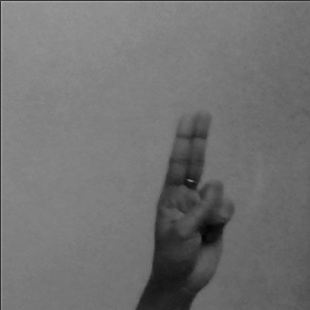

In [ ]:
Image.fromarray(images[1700])

In [ ]:
images.shape

(4467, 310, 310)

In [ ]:
## reshaping in the form of tensors
input_train = images.reshape(images.shape[0],310,310,1)
input_validation = validation_images.reshape(validation_images.shape[0],310,310,1)

In [ ]:
input_train = input_train.astype('float32')
input_train = input_train / 255

In [ ]:
input_train.shape

(4467, 310, 310, 1)

In [ ]:
input_validation = input_validation.astype('float32')
input_validation = input_validation / 255

In [ ]:
input_validation.shape

(613, 310, 310, 1)

In [ ]:
## model architecture
model = Sequential()
model.add(BatchNormalization(input_shape = (310,310,1)))
model.add(Conv2D(32, (3,3), activation ='relu', input_shape = (310,310, 1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=4,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten()) 
model.add(Dense(units=256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 7, activation = 'softmax'))

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
set(target_images)

{0, 1, 2, 3, 4, 5, 6}

In [ ]:
## performs encoding for output variable
y_train = np_utils.to_categorical(target_images,7)
y_valid = np_utils.to_categorical(validation_target_images,7)
x_train = input_train
x_valid = input_validation

In [ ]:
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((613, 310, 310, 1), (613, 7), (4467, 310, 310, 1), (4467, 7))

In [ ]:
## using image data generators to avoid overfitting
gen = ImageDataGenerator(shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(x_train, y_train, batch_size=10)
valid_generator = test_gen.flow(x_valid, y_valid, batch_size=10)

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=4467//10,epochs=50,validation_data=valid_generator,
                             validation_steps=613//10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
446/446 [==============================] - 38s 84ms/step - loss: 1.8074 - accuracy: 0.1905 - val_loss: 1.8856 - val_accuracy: 0.1754
Epoch 2/50
446/446 [==============================] - 37s 83ms/step - loss: 1.7459 - accuracy: 0.1914 - val_loss: 1.9629 - val_accuracy: 0.1820
Epoch 3/50
446/446 [==============================] - 37s 83ms/step - loss: 1.7157 - accuracy: 0.1936 - val_loss: 1.8949 - val_accuracy: 0.1738
Epoch 4/50
446/446 [==============================] - 38s 84ms/step - loss: 1.7011 - accuracy: 0.2060 - val_loss: 1.9030 - val_accuracy: 0.1803
Epoch 5/50
446/446 [==============================] - 38s 85ms/step - loss: 1.6713 - accuracy: 0.2318 - val_loss: 1.9673 - val_accuracy: 0.2115
Epoch 6/50
446/446 [==============================] - 37s 84ms/step - loss: 1.6378 - accuracy: 0.2751 - val_loss: 1.6519 - val_accuracy: 0.3426
Epoch 7/50
446/446 [==============================] - 38s 84

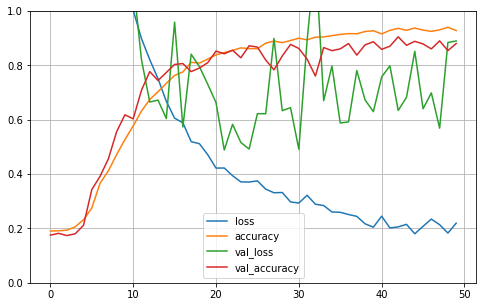

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.x_label("Epochs")
plt.y_label("Performance")
plt.show()

In [ ]:
## saving the model
model_json = model.to_json()
with open('/content/drive/My Drive/data/model/detector_12.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('/content/drive/My Drive/detector_12.h5')